In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Constants
l = 0.4
m = 1
g = 9.81

In [3]:
def f(r,t):
    theta1=r[0,0]
    omega1=r[0,1]
    theta2=r[1,0]
    omega2=r[1,1]
    ftheta1=omega1
    fomega1=-((omega1**2)*np.sin(2*theta1-2*theta2)+2*(omega2**2)*np.sin(theta1-theta2)+(g/l)*(np.sin(theta1-2*theta2)+3*np.sin(theta1)))/(3-np.cos(2*theta1-2*theta2))
    ftheta2=omega2
    fomega2=(4*(omega1**2)*np.sin(theta1-theta2)+(omega2**2)*np.sin(2*theta1-2*theta2)+2*(g/l)*(np.sin(2*theta1-theta2)-np.sin(theta2)))/(3-np.cos(2*theta1-2*theta2))
    return np.array([[ftheta1,fomega1],[ftheta2,fomega2]],float)

In [4]:
def U(r,t):
    theta1=r[0,0]
    theta2=r[1,0]
    return -m*g*l*(2*np.cos(theta1)+np.cos(theta2))

In [5]:
def T(r,t):
    theta1=r[0,0]
    omega1=r[0,1]
    theta2=r[1,0]
    omega2=r[1,1]
    return m*(l**2)*((omega1**2)+0.5*(omega2**2)+omega1*omega2*np.cos(theta1-theta2))

In [6]:
def E(r,t):
    theta1=r[0,0]
    omega1=r[0,1]
    theta2=r[1,0]
    omega2=r[1,1]
    return -m*g*l*(2*np.cos(theta1)+np.cos(theta2))+m*(l**2)*((omega1**2)+0.5*(omega2**2)+omega1*omega2*np.cos(theta1-theta2))

In [7]:
### Set parameters
N = 1000
a = 0.0     ### Start
b = 100       ### End
h = (b-a)/N

tpoints = np.arange(a,b,h)
Theta_points1 = []
Theta_points2 = []
Omega_points1 = []
Omega_points2 = []
E_points = []

### Initial conditions
r = np.array([[np.pi/2,0],[np.pi/2,0]],float)

In [13]:
### Using Fourth-order Runge-Kutta method
for t in tpoints:
    Theta_points1.append(r[0,0])
    Theta_points2.append(r[1,0])
    Omega_points1.append(r[0,1])
    Omega_points2.append(r[1,1])
    E_points.append(E(r,t))
    
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/6

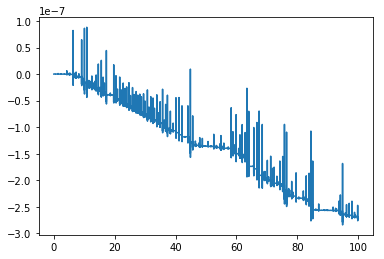

In [9]:
plt.plot(tpoints, E_points)
plt.show()

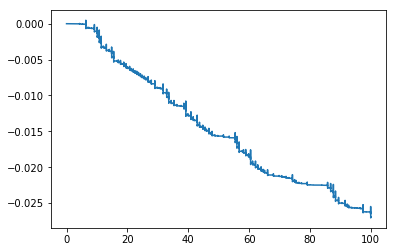

In [9]:
plt.plot(tpoints, E_points)
plt.show()

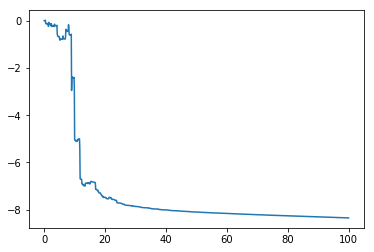

In [14]:
plt.plot(tpoints, E_points)
plt.show()

In [11]:
delta = 1e-5
error=1

In [ ]:
while error>delta:
    for a in range(0,100):
        for t in tpoints:
            h1=a
            
            Theta_points1.append(r[0,0])
            Theta_points2.append(r[1,0])
            Omega_points1.append(r[0,1])
            Omega_points2.append(r[1,1])
            E_points.append(E(r,t))
    
            k1=h*f(r,t)
            k2=h*f(r+0.5*k1,t+0.5*a)
            k3=h*f(r+0.5*k2,t+0.5*a)
            k4=h*f(r+k3,t+a)
            r+=(k1+2*k2+2*k3+k4)/6
    
            error=np.max(E_points)

In [10]:
plt.plot(tpoints, E_points)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)